# Expand window

In [31]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Import Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load train and test data

In [33]:
test_data = pd.read_csv("../../data/test.csv")
print(test_data.shape)
test_data.sample(5)

(109541, 13)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
107693,10272003,"8,000",10+ years,Mortgage,50000.0,VERIFIED - income source,debt_consolidation,20.36,0,NaN,13,32,Female
5353,10169663,"12,400",10+ years,Own,48000.0,VERIFIED - income source,debt_consolidation,29.85,0,NaN,10,18,Male
6882,10171192,"14,000",2 years,Rent,150000.0,VERIFIED - income source,debt_consolidation,10.86,1,17.0,6,27,Female
101347,10265657,"22,000",9 years,Rent,107000.0,VERIFIED - income source,debt_consolidation,18.77,2,NaN,12,25,Male
94829,10259139,"9,800",2 years,NaN,24000.0,VERIFIED - income source,debt_consolidation,21.25,1,NaN,7,14,Male


In [34]:
train_data = pd.read_csv("../../data/train.csv")

print(train_data.shape)

train_data.sample(5)

(164309, 14)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
7250,10007251,"14,400",10+ years,Rent,80000.0,VERIFIED - income source,debt_consolidation,19.32,4,NaN,10,23,Male,1
142541,10142542,"12,000",10+ years,Mortgage,NaN,VERIFIED - income,debt_consolidation,12.87,1,17.0,12,35,Male,2
162327,10162328,"8,000",3 years,Rent,99000.0,not verified,debt_consolidation,12.35,1,NaN,13,26,Male,2
59995,10059996,"10,100",10+ years,Rent,49000.0,not verified,debt_consolidation,14.25,0,NaN,6,15,Male,3
39317,10039318,"10,000",3 years,Rent,45000.0,VERIFIED - income,debt_consolidation,15.15,2,NaN,5,10,Male,3


# Clean data types

In [35]:
train_data.select_dtypes(exclude='object').head()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
0,10000001,68000.0,18.37,0,NaN,9,14,1
1,10000002,NaN,14.93,0,17.0,12,24,3
2,10000003,75566.4,15.88,0,NaN,12,16,3
3,10000004,56160.0,14.34,3,NaN,16,22,3
4,10000005,96000.0,22.17,1,NaN,19,30,1


In [36]:
train_data.select_dtypes(include='object').head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,"7,000",< 1 year,Rent,not verified,car,Female
1,"30,000",4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,"24,725",7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,"16,000",< 1 year,NaN,VERIFIED - income source,debt_consolidation,Male
4,"17,000",8 years,Own,VERIFIED - income source,debt_consolidation,Female


<b> From above we can see that 'Loan_Amount_Requested' is number but considered as an object <br /> Q: Why?</b> 

In [37]:
train_data['Loan_Amount_Requested'].sample(10)

7007      15,000
65887      3,500
117369    14,000
4001      16,000
42719     30,000
95984     16,000
103622    10,800
95695     15,000
120451    11,050
75013      6,200
Name: Loan_Amount_Requested, dtype: object

<b> Ans: We can see that it has comma separated value and is considered as string </b>

In [38]:
print("before conversion:", train_data['Loan_Amount_Requested'].dtype)

#Remove comma in string and convert to int
train_data['Loan_Amount_Requested'] = train_data['Loan_Amount_Requested'].apply(lambda val: int(val.replace(',', '')))

print("After conversion: ", train_data['Loan_Amount_Requested'].dtype)

before conversion: object
After conversion:  int64


# Check for null

In [39]:
def get_missing_info(data_frame, include_empty = False):
    missing_count = data_frame.isnull().sum()
    
    percent_missing = (missing_count/len(data_frame)) * 100  
    
    percent_missing_df = percent_missing.to_frame("Percent_Missing")
    percent_missing_df['Total_Missing'] = missing_count
    
    if include_empty:
        return percent_missing_df
    
    return percent_missing_df.loc[percent_missing_df['Percent_Missing'] > 0]

In [40]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Length_Employed,4.486060,7371
Home_Owner,15.427639,25349
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


## Impute missing data

### 1. Length Employed

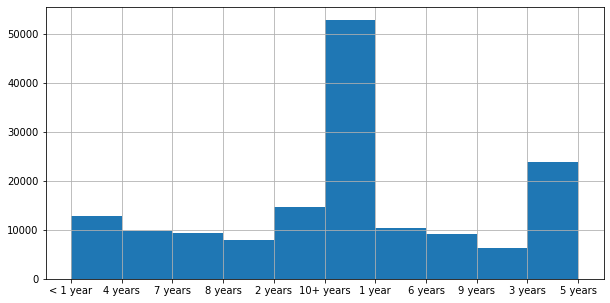

In [41]:
train_data['Length_Employed'].hist(bins=10,figsize=(10,5));

In [42]:
train_data['Length_Employed'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)

,Share
10+ years,32.204566
2 years,8.897869
3 years,7.896098
< 1 year,7.793243
5 years,6.581502
1 year,6.342927
4 years,5.954634
7 years,5.664936
6 years,5.534694
8 years,4.818361


Majority of data is skewed at 10+ years. So its better to take median value to impute 'Length_Employed'

In [43]:
train_data['Length_Employed'] = train_data['Length_Employed'].fillna('1 year')

print(train_data['Length_Employed'].isna().sum())
get_missing_info(train_data)

0


,Percent_Missing,Total_Missing
Home_Owner,15.427639,25349
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


### 2. Home owner

In [44]:
train_data['Home_Owner'].describe()

count       138960
unique           5
top       Mortgage
freq         70345
Name: Home_Owner, dtype: object

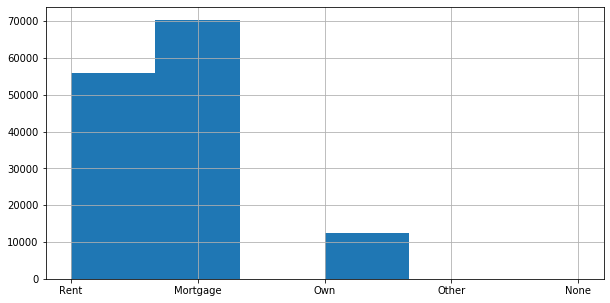

In [45]:
train_data['Home_Owner'].hist(bins = 6, figsize=(10,5));

In [46]:
train_data['Home_Owner'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)

,Share
Mortgage,42.812627
Rent,34.100993
NaN,15.427639
Own,7.622833
Other,0.029822
None,0.006086


Majority of data is skewed towards 'Mortgage'. So let's fillna with nearly centered value which is 'Rent'

In [47]:
train_data['Home_Owner'] = train_data['Home_Owner'].fillna('Rent')
print(train_data['Home_Owner'].isna().sum())
get_missing_info(train_data)

0


,Percent_Missing,Total_Missing
Annual_Income,15.277313,25102
Months_Since_Deliquency,53.788289,88379


### 3. Annual Income

In [48]:
train_data['Annual_Income'].describe()

count    1.392070e+05
mean     7.333116e+04
std      6.037750e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.869750e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [49]:
train_data['Annual_Income'].min(), train_data['Annual_Income'].max()

(4000.0, 7500000.0)

In [50]:
train_data['Annual_Income'].median()

63000.0

We can see that there is huge difference between 'min' and 'max'. let's fillna with median

In [51]:
train_data['Annual_Income'] = train_data['Annual_Income'].fillna(train_data['Annual_Income'].median())
print(train_data['Annual_Income'].isna().sum())
get_missing_info(train_data)

0


,Percent_Missing,Total_Missing
Months_Since_Deliquency,53.788289,88379


### 4. Months Since Deliquency

In [52]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing
Months_Since_Deliquency,53.788289,88379


As we can see that more than 50% of data is missing. Let's just drop and not use this column

In [53]:
train_data = train_data.drop('Months_Since_Deliquency', axis = 1, errors='ignore')

print(train_data.shape)
train_data.head()

(164309, 13)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,30000,4 years,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,16000,< 1 year,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [54]:
get_missing_info(train_data)

,Percent_Missing,Total_Missing


# Store imputed data

In [ ]:
train_data.to_csv("../../data/filled_train.csv", index=False)

# Analysis

In [ ]:
for i in range(1,4):
    print("Interest Rate Category:", i)
    print("-------------------------")
    print("Loan Min:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].min())
    print("Loan Max:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].max())
    print("Loan Mean:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].mean())
    
    print(" ")

In [ ]:
purposes = list(train_data['Purpose_Of_Loan'].unique())
purposes

In [ ]:
sorted_loan = train_data['Purpose_Of_Loan'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)
sorted_loan

In [ ]:
for purpose in sorted_loan.index[0:4]:
    print(purpose)
    print("================")
    print(train_data.loc[train_data['Purpose_Of_Loan'] == purpose, 'Home_Owner'].value_counts(ascending=False))
    print("")

#### From above data we can see that main purpose of loan is through 'debt consolidation' and that too for people who are staying in 'Rent' houses

In [ ]:
train_data.head()

In [ ]:
rent_debt_consolidation = train_data.loc[(train_data['Purpose_Of_Loan'] == 'debt_consolidation') & (train_data['Home_Owner'] == 'Rent')]
rent_debt_consolidation.sample(10)

In [ ]:
rent_debt_consolidation['Interest_Rate'].value_counts().plot(kind='pie')

In [ ]:
rent_debt_consolidation['Loan_Amount_Requested'].hist(bins=5, figsize=(5,5));
plt.title("Loan amount requested for 'debt_consolidation' for 'renting' people")

In [ ]:
train_data['Loan_Amount_Requested'].hist(bins=5, figsize=(5,5));
plt.title("Loan amount requested");

Data is skewed around 5k-20k

In [ ]:
train_data['Gender'].value_counts().plot(kind='pie')

In [ ]:
train_data.head()